In [1]:
import numpy as np
from matplotlib import pylab as plt
import math
eps=0.01

In [2]:
def F_calc(xxx): 
    F=0
    F=4**xxx - 5*xxx -2
    return F

In [3]:
def F_shtrih_1(xxx): 
    F=0
    F=(4**xxx)*np.log(4) - 5
    return F

In [4]:
def F_shtrih_2(xxx): 
    F=0
    F=(4**xxx)*np.log(4)*np.log(4)
    return F

In [5]:
def F_x(xxx):#for simple iterations
    F=0
    F=math.log(5*xxx+2, 4) 
    return F

In [6]:
def function_plt(n):
    #F=0
    y_plot=[]
    #x=[]
    x_plot=np.linspace(-n,n,500)
    
    for i in x_plot:
        y_plot.append(F_calc(i))
    
    plt.plot(x_plot,y_plot,'--',color='red')
    
    y_plot.clear()
    for i in x_plot:
        y_plot.append(0)
        
    plt.plot(x_plot,y_plot,'--',color='black')
    
    plt.grid(True)
    plt.show()
    
    #x.clear()
    #print(x)
    y_plot.clear()

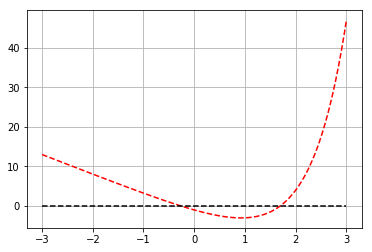

In [7]:
function_plt(3)

In [8]:
#Razbienie
#nn=int(input())
x=[]
y=[]
i=0
#for i in range(nn):
while True:
    #print(x)
    #print(y)
    #print('i',i)
    if (i==0) or (i==1):
        x.append(i)
        y.append(F_calc(i))
        i+=1
        continue
    elif y[i-2]*y[i-1]<0:
        #x.append(i)
        #y.append(F_calc(i))
        break
    elif i==15:
        break
    else:
        x.append(i)
        y.append(F_calc(i))
        i+=1
        continue
    
#print(x)
#print(y)

indexes=[]#make interval
for i in range(len(y)-1):
    if y[i]*y[i+1]<0:
        indexes.append(x[i:i+2])
        indexes.append(y[i:i+2])
    else:
        continue       
#print(indexes)
print()

x=indexes[0]
y=indexes[1]

print('x or [a,b]: ',x)
print('y: ',y)


x or [a,b]:  [1, 2]
y:  [-3, 4]


In [9]:
#method 1 Половинное деление
x_1=[]
x_1.clear()
for i in x:
    x_1.append(i)
tmp=[]
counter=0
while abs(x_1[1]-x_1[0])>eps:
    
        x_finalle=(x_1[0]+x_1[1])/2
        print(counter,x_finalle,x_1)
        counter+=1
        
        if F_calc(x_1[0])*F_calc(x_finalle)<0:
            x_1[0]=x_1[0]
            x_1[1]=x_finalle
        
        x_finalle=(x_1[0]+x_1[1])/2
        
        if F_calc(x_1[0])*F_calc(x_finalle)>0:
            x_1[0]=x_finalle
            x_1[1]=x_1[1]
        #print(x_1)
        
print(x_finalle)
print('in this dot: ',F_calc(x_finalle))

0 1.5 [1, 2]
1 1.75 [1.5, 2]
2 1.6875 [1.625, 1.75]
3 1.71875 [1.6875, 1.75]
4 1.703125 [1.6875, 1.71875]
5 1.6953125 [1.6875, 1.703125]
1.69140625
in this dot:  -0.025981128464513503


In [10]:
#method 2 simple iteration
x_2=[]
x_2.clear()
for i in x:
    x_2.append(i)
tmp=[]

#x_2[0]=-0.25;x_2[1]=-0.2
#print(x_2)
x_finalle=F_x((x_2[1]+x_2[0])/2)
x_i=x_2[0]

print(x_finalle)
k=0

counter=0
while abs(x_finalle-x_i)>eps:
    print(counter,x_finalle,x_i)
    counter+=1
    
    x_i=x_finalle
    x_finalle=F_x(x_finalle)   

x_2=[x_i,x_finalle]
print(x_finalle,'otrez: ',x_2)
print('in this dot: ',F_calc(x_finalle))

1.6239637567217928
0 1.6239637567217928 1
1 1.6695557753486527 1.6239637567217928
2 1.685624612591419 1.6695557753486527
1.6912038041558715 otrez:  [1.685624612591419, 1.6912038041558715]
in this dot:  -0.02789595782226506


In [11]:
#method 2 simple iteration
x_2=[]
x_2.clear()
for i in x:
    x_2.append(i)
tmp=[]

#x_2[0]=-0.25;x_2[1]=-0.2
#print(x_2)
x_finalle=F_x((x_2[1]+x_2[0])/2)
x_i=x_2[0]

print(x_finalle)
k=0

counter=0
while abs(F_calc(x_i))>eps:
    print(counter,x_finalle,x_i)
    counter+=1
    
    x_i=x_finalle
    x_finalle=F_x(x_finalle)   

x_2=[x_i,x_finalle]
print(x_finalle,'otrez: ',x_2)
print('in this dot: ',F_calc(x_finalle))

1.6239637567217928
0 1.6239637567217928 1
1 1.6695557753486527 1.6239637567217928
2 1.685624612591419 1.6695557753486527
3 1.6912038041558715 1.685624612591419
4 1.6931308827873646 1.6912038041558715
1.6937953102745573 otrez:  [1.6931308827873646, 1.6937953102745573]
in this dot:  -0.0033221374359619915


In [12]:
#method 3 Newthon`s

x_3=[]
y_3=[]
x_3.clear()
y_3.clear()
for i in x:
    x_3.append(i)
tmp=[]
for i in y:
    y_3.append(i)
    
#neobhodimoe yslovie
flag='zero'
if F_calc(x_3[0])*F_shtrih_2(x_3[0])>0:#x=a
    flag='a'
    x_finalle=x_3[0]
else:
    if F_calc(x_3[1])*F_shtrih_2(x_3[1])>0:#x=b
        x_finalle=x_3[1]
        flag='b'
    else:
        print('errrro')

if y_3[1]>y_3[0]:
    x_finalle=x_3[1]
    flag='b'
else:
    x_finalle=x_3[0]
    flag='a'

counter=0
if flag=='b':
    while abs(F_calc(x_finalle)/F_shtrih_1(x_finalle))>eps:

            print(counter,x_finalle,x_3)
            counter+=1

            if F_calc(x_finalle)/F_shtrih_1(x_finalle)!=0: 
                x_finalle=x_finalle - (F_calc(x_finalle))/(F_shtrih_1(x_finalle)) 
                x_3[0]=x_3[0]
                x_3[1]=x_finalle
                continue                
            else:
                print('we`ve find it: ',x_finalle)
                break
            print(x_3)
            
elif flag=='a':
    while abs(F_calc(x_finalle)/F_shtrih_1(x_finalle))>eps:

            print(counter,x_finalle,x_3)
            counter+=1

            if F_calc(x_finalle)/F_shtrih_1(x_finalle)!=0: 
                x_finalle=x_finalle - (F_calc(x_finalle))/(F_shtrih_1(x_finalle)) 
                x_3[0]=x_finalle
                x_3[1]=x_3[1]
                continue                
            else:
                print('we`ve find it: ',x_finalle)
                break
            print(x_3)
        
print(x_finalle,'pogreshnost` ',F_calc(x_finalle)/F_shtrih_1(x_finalle))
#print(x_finalle,x_3)
print('in this dot: ',F_calc(x_finalle))

0 2 [1, 2]
1 1.7671807479606543 [1, 1.7671807479606543]
1.6993365258165076 pogreshnost`  0.005163629863068779
in this dot:  0.0496759650188654


In [13]:
#method 3 Newthon`s

x_3=[]
y_3=[]
x_3.clear()
y_3.clear()
for i in x:
    x_3.append(i)
tmp=[]
for i in y:
    y_3.append(i)
    
#neobhodimoe yslovie
flag='zero'
if F_calc(x_3[0])*F_shtrih_2(x_3[0])>0:#x=a
    flag='a'
    x_finalle=x_3[0]
else:
    if F_calc(x_3[1])*F_shtrih_2(x_3[1])>0:#x=b
        x_finalle=x_3[1]
        flag='b'
    else:
        print('errrro')

if y_3[1]>y_3[0]:
    x_finalle=x_3[1]
    flag='b'
else:
    x_finalle=x_3[0]
    flag='a'

counter=0
if flag=='b':
    while abs(F_calc(x_finalle))>eps:

            print(counter,x_finalle,x_3)
            counter+=1

            if F_calc(x_finalle)/F_shtrih_1(x_finalle)!=0: 
                x_finalle=x_finalle - (F_calc(x_finalle))/(F_shtrih_1(x_finalle)) 
                x_3[0]=x_3[0]
                x_3[1]=x_finalle
                continue                
            else:
                print('we`ve find it: ',x_finalle)
                break
            print(x_3)
            
elif flag=='a':
    while abs(F_calc(x_finalle))>eps:

            print(counter,x_finalle,x_3)
            counter+=1

            if F_calc(x_finalle)/F_shtrih_1(x_finalle)!=0: 
                x_finalle=x_finalle - (F_calc(x_finalle))/(F_shtrih_1(x_finalle)) 
                x_3[0]=x_finalle
                x_3[1]=x_3[1]
                continue                
            else:
                print('we`ve find it: ',x_finalle)
                break
            print(x_3)
        
print(x_finalle,'pogreshnost` ',F_calc(x_finalle)/F_shtrih_1(x_finalle))
#print(x_finalle,x_3)
print('in this dot: ',F_calc(x_finalle))

0 2 [1, 2]
1 1.7671807479606543 [1, 1.7671807479606543]
2 1.6993365258165076 [1, 1.6993365258165076]
1.6941728959534388 pogreshnost`  2.8326974502095785e-05
in this dot:  0.00026956158771263006


In [15]:
#method 4 (sechenia)

x_4=[]
y_4=[]
x_4.clear()
y_4.clear()
for i in x:
    x_4.append(i)
tmp=[]
for i in y:
    y_4.append(i)

x_finalle=x_4[0] - ((x_4[1] - x_4[0])/(F_calc(x_4[1])-F_calc(x_4[0])))*F_calc(x_4[0])
counter=0
while abs(x_4[1]-x_4[0])>eps:    

        print(counter,x_finalle,x_4)
        counter+=1
        
        if F_calc(x_4[0])*F_calc(x_4[1])<0: 
            
            x_finalle=x_4[0] - ((x_4[1] - x_4[0])/(F_calc(x_4[1])-F_calc(x_4[0])))*F_calc(x_4[0])
            if F_calc(x_finalle) == 0:
                print('we`ve find it: ',x_finalle)
                break
            elif F_calc(x_finalle) > 0:            
                x_4[0]=x_4[0]
                x_4[1]=x_finalle
                x_finalle=x_4[0] - ((x_4[1] - x_4[0])/(F_calc(x_4[1])-F_calc(x_4[0])))*F_calc(x_4[0])
                continue
            else:
                x_4[0]=x_finalle 
                x_4[1]=x_4[1]
                x_finalle=x_4[0] - ((x_4[1] - x_4[0])/(F_calc(x_4[1])-F_calc(x_4[0])))*F_calc(x_4[0])
                continue
                
        elif F_calc(x_4[0])*F_calc(x_4[1])>0:
            print('crashed')
            break
            
        #x_finalle=x_4[0] - ((x_4[1] - x_4[0])/(F_calc(x_4[1])-F_calc(x_4[0])))*F_calc(x_4[0])
        
        print(x_4)
        
print(x_finalle,x_4)
print('in this dot: ',F_calc(x_finalle))    

0 1.4285714285714286 [1, 2]
1 1.612398169379649 [1.4285714285714286, 2]
2 1.6710424729469502 [1.612398169379649, 2]
3 1.6877861224336823 [1.6710424729469502, 2]
4 1.692407562566647 [1.6877861224336823, 2]
5 1.6936710279539953 [1.692407562566647, 2]
6 1.6940155448620966 [1.6936710279539953, 2]
7 1.6941094191596666 [1.6940155448620966, 2]
8 1.6941349931249832 [1.6941094191596666, 2]
9 1.6941419598126737 [1.6941349931249832, 2]
10 1.6941438576033945 [1.6941419598126737, 2]
11 1.6941443745772509 [1.6941438576033945, 2]
12 1.6941445154050452 [1.6941443745772509, 2]
13 1.694144553767646 [1.6941445154050452, 2]
14 1.69414456421792 [1.694144553767646, 2]
15 1.6941445670646567 [1.69414456421792, 2]
16 1.6941445678401301 [1.6941445670646567, 2]
17 1.6941445680513751 [1.6941445678401301, 2]
18 1.69414456810892 [1.6941445680513751, 2]
19 1.6941445681245957 [1.69414456810892, 2]
20 1.6941445681288658 [1.6941445681245957, 2]
21 1.6941445681300291 [1.6941445681288658, 2]
22 1.694144568130346 [1.69414

In [12]:
#half deviding version2
#Razbienie
x=[]
y=[]
flag=1
i=0
j=0
step=0.1
while True:
    #print(x)
    #print(y)
    #print('i',i)
    if (i==0) or (i==1):
        x.append(j)
        y.append(F_calc(j))
        i+=1
        j+=step
        continue
    elif y[i-2]*y[i-1]<0:
        #x.append(i)
        #y.append(F_calc(i))
        break
    elif i==500:
        flag=0
        break
    else:
        x.append(j)
        y.append(F_calc(j))
        j+=step
        i+=1
        continue
    
#print(x)
#print(y)

indexes=[]#make interval
for i in range(len(y)-1):
    if y[i]*y[i+1]<0:
        indexes.append(x[i:i+2])
        indexes.append(y[i:i+2])
    else:
        continue       
#print(indexes)
print()
if indexes!= []:
    x=indexes[0]
    y=indexes[1]
    print('x or [a,b]: ',x)
    print('y: ',y)
print('Is there any roots?:',flag)



x or [a,b]:  [1.6000000000000003, 1.7000000000000004]
y:  [-0.8104131600237174, 0.05606328618315892]
Is there any roots?: 1
